## Finite element method - One dimensional Poisson equation

(Initially inspired by https://en.wikipedia.org/wiki/Finite_element_method)

### Mathematical formulation

The one dimensional Poisson equation is stated as a boundary value problem

$$ -\phi''(x) = f(x), ~\text{for}~ x \in [a, b] $$
$$ \phi(x = a) = \phi_a $$
$$ \phi(x = b) = \phi_b $$ 

Integrating both sides with a test function $v(x)$ that satisfies $v(a) = v(b) = 0$, we obtain, using partial integration, the weak formulation of the problem

$$ \int_a^b \phi'(x) v'(x) dx = \int_a^b f(x) v(x) dx $$

By restricting ourselves to test functions $v(x)$ that are piecewise linear on $[a, b]$ with $M$ nodes $x_i = a + h*(b - a)$, $h = (b - a)/M$, namely

$$ v_i(x) = \frac{x - x_{i-1}}{x_{i} - x_{i-1}} \mathbb{1}_{\{x \in [x_{i-1}, x_{i}]\}} + \frac{x_{i+1} - x}{x_{i+1} - x_i} \mathbb{1}_{\{x \in [x_i, x_{i+1}]\}} $$

and by expanding $f(x)$ and $\phi'(x)$ in this basis as

$$ f(x) = \sum_{i=0}^M f(x_i) v_i(x) $$
$$ \phi'(x) = \sum_{i=0}^M \phi(x_i) v_i'(x) $$

we are left with calculating the following matrix equation:

$$ \mathbf{L} \phi = \mathbf{K} f $$

with 

$$ \mathbf{L}_{ij} = \int_a^b v_i'(x) v_j'(x) dx $$
$$ \mathbf{K}_{ij} = \int_a^b v_i(x) v_j(x) dx $$

These integrals can be calculated analytically. For details of the calculation, see "notes". They evaluate to

$$ \int_a^b v_i(x) v_j(x) dx = \begin{cases} 0 & |i - j| > 1 \\ \frac{h}{6} & |i - j| = 1 \\ \frac{2h}{3} & i = j \end{cases} $$

and

$$ \int_a^b v_i'(x) v_j'(x) dx = \begin{cases} 0 & |i - j| > 1 \\ \frac{1}{h} & |i - j| = 1 \\ \frac{2}{h} & i = j \end{cases} $$

### Simple example

Validating the special case in $x \in [0, 1]$ with

$$ u(x) = 1 - \frac{x^2}{2} $$

such that we would have

$$ f(x) = 1 $$

(Method proposed in Chapter 2.3 in Langtangen, Logg: Solving PDEs in Python - The FEniCS Tutorial I

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Definitions

In [10]:
a = 0
b = 1
M = 100
h = (b - a) / M

Defining the matrices $\mathbf{L}$ and $\mathbf{K}$.

In [11]:
L = np.zeros((M, M))
K = np.zeros((M, M))
for m in range(1,M-1):
    for n in range(M):
        if n == m:
            L[m, n] = 2/h
            K[m, n] = 2*h/3
        if abs(n - m) == 1:
            L[m, n] = -1/h
            K[m, n] = h/6

Enforcing the boundary conditions

In [12]:
L[0, 0] = 1
L[M-1, M-1] = 1
K[0, 0] = 1  # u(0) = 1
K[M-1, M-1] = 0.5  # u(1) = 0.5

Checking if the finite element solution indeed approximates the exactly constructed solution

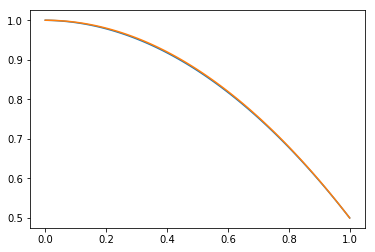

In [13]:
X = np.linspace(a, b, M)
f = np.ones(M)
phi = np.linalg.solve(L, np.dot(K, f))
plt.plot(X, phi)
plt.plot(X, 1 - X**2 / 2)